### Dealing with SQLite Database with Python

In [1]:
# importing required modules
import sqlite3

In [3]:
# creation of a database if it does not pre-exist or use the existing one
try:
    connection = sqlite3.connect("myemp.db")     # .db extension indicates that it is a database file
    print ("Your Database Connectivity has been established successfully...")
except:
    print ("Some exception has taken place...!!!")
    print ("Please check your database connectivity...")

Your Database Connectivity has been established successfully...


> Now search on Google with the search string "SQLite Manager online". And click on the following URL -
> https://extendsclass.com/sqlite-browser.html

In [4]:
# create employee table as employee(emp_id, emp_name, emp_city, emp_salary)
sqlStr = '''
         CREATE TABLE employee (
         emp_id INTEGER PRIMARY KEY,
         emp_name TEXT,
         emp_city TEXT,
         emp_salary REAL);
         '''
try:    # create the table if it does not pre-exist
    connection.execute(sqlStr)
    print ("Database table has been created successfully...")
except:
    print ("Some exception has taken place...!!!")
    print ("Please check your database connectivity and the SQL query...")

Database table has been created successfully...


In [8]:
# displaying the table structure or schema of the database table employee
print (connection.execute("pragma table_info(employee)"))
print (list(connection.execute("pragma table_info(employee)")))
print ()
for row in list(connection.execute("pragma table_info(employee)")):
    print (row)

[(0, 'emp_id', 'INTEGER', 0, None, 1), (1, 'emp_name', 'TEXT', 0, None, 0), (2, 'emp_city', 'TEXT', 0, None, 0), (3, 'emp_salary', 'REAL', 0, None, 0)]

(0, 'emp_id', 'INTEGER', 0, None, 1)
(1, 'emp_name', 'TEXT', 0, None, 0)
(2, 'emp_city', 'TEXT', 0, None, 0)
(3, 'emp_salary', 'REAL', 0, None, 0)


In [19]:
# inserting records reading from the csv file and writing it to the database table employee
import csv   # importing the required module
sqlStr = """
         INSERT INTO employee
         VALUES('{emp_id}', '{emp_name}', '{emp_city}', '{emp_salary}');
         """
# read line from the csv file and store them into the table
with open('emp_data.csv') as data_file:
    csv_reader = csv.reader(data_file)  # creating a buffer space to hold read data temporarily
    print (csv_reader)
    print (list(csv_reader))
    print (tuple(csv_reader))
    print (len(list(csv_reader)))

[['1001', 'Dhiman', 'Kolkata', '39000'], ['1002', 'Anupam', 'Kolkata', '25000'], ['1003', 'Subham', 'Mumbai', '36000'], ['1004', 'Dinesh', 'Chennai', '28000'], ['1005', 'Kakali', 'Mumbai', '25000'], ['1006', 'Bimal', 'Hyderabad', '30000'], ['1007', 'Tarun', 'Chennai', '17000'], ['1008', 'Rittik', 'Durgapur', '45000'], ['1009', 'Barun', 'Hyderabad', '39000'], ['1010', 'Utpal', 'Lucknow', '20000']]
()
0


In [20]:
# inserting records reading from the csv file and writing it to the database table employee
import csv   # importing the required module
sqlStr = """
         INSERT INTO employee
         VALUES('{emp_id}', '{emp_name}', '{emp_city}', '{emp_salary}');
         """
# read line from the csv file and store them into the table
with open('emp_data.csv') as data_file:
    csv_reader = csv.reader(data_file)  # creating a buffer space to hold read data temporarily
    for row in csv_reader:
        connection.execute(sqlStr.format(emp_id = row[0], emp_name = row[1], emp_city = row[2], emp_salary = row[3]))
        
connection.commit()    # to make the change permanent
print ("All data records got inserted successfully...")

All data records got inserted successfully...


In [21]:
csv_reader = csv.reader(data_file)

ValueError: I/O operation on closed file.

In [26]:
# retrieving records from the database table
# SQL for fetching all the records from the table
sqlStr ="SELECT * FROM employee;"

# read from table and point the cursor into the variable cur_table
cur_table = connection.execute(sqlStr)
# print (list(cur_table))
# print (len(list(cur_table)))
for row in cur_table:
    print (f"Emp_ID: {row[0]}, Emp_Name: {row[1]}, Emp_City: {row[2]} and Emp_Salary: {row[3]}...")

Emp_ID: 1001, Emp_Name: Dhiman, Emp_City: Kolkata and Emp_Salary: 39000.0...
Emp_ID: 1002, Emp_Name: Anupam, Emp_City: Kolkata and Emp_Salary: 25000.0...
Emp_ID: 1003, Emp_Name: Subham, Emp_City: Mumbai and Emp_Salary: 36000.0...
Emp_ID: 1004, Emp_Name: Dinesh, Emp_City: Chennai and Emp_Salary: 28000.0...
Emp_ID: 1005, Emp_Name: Kakali, Emp_City: Mumbai and Emp_Salary: 25000.0...
Emp_ID: 1006, Emp_Name: Bimal, Emp_City: Hyderabad and Emp_Salary: 30000.0...
Emp_ID: 1007, Emp_Name: Tarun, Emp_City: Chennai and Emp_Salary: 17000.0...
Emp_ID: 1008, Emp_Name: Rittik, Emp_City: Durgapur and Emp_Salary: 45000.0...
Emp_ID: 1009, Emp_Name: Barun, Emp_City: Hyderabad and Emp_Salary: 39000.0...
Emp_ID: 1010, Emp_Name: Utpal, Emp_City: Lucknow and Emp_Salary: 20000.0...


In [ ]:
Class Assignment - 2 / Day-3
============================
Fetch employee name, salary and salary * 10% as TDS against salaries of all employees in the employee table. 

In [31]:
sqlStr = "SELECT emp_name, emp_salary, emp_salary * 0.10 FROM employee;"
cur_table = connection.execute(sqlStr)
for row in cur_table:
    print (f"Emp-Name: {row[0]}, Emp-Salary: {row[1]} and Emp-TDS: {row[2]}...")
print ("End of the query processing...")

Emp-Name: Dhiman, Emp-Salary: 39000.0 and Emp-TDS: 3900.0...
Emp-Name: Anupam, Emp-Salary: 25000.0 and Emp-TDS: 2500.0...
Emp-Name: Subham, Emp-Salary: 36000.0 and Emp-TDS: 3600.0...
Emp-Name: Dinesh, Emp-Salary: 30000.0 and Emp-TDS: 3000.0...
Emp-Name: Kakali, Emp-Salary: 25000.0 and Emp-TDS: 2500.0...
Emp-Name: Bimal, Emp-Salary: 30000.0 and Emp-TDS: 3000.0...
Emp-Name: Tarun, Emp-Salary: 30000.0 and Emp-TDS: 3000.0...
Emp-Name: Rittik, Emp-Salary: 45000.0 and Emp-TDS: 4500.0...
Emp-Name: Barun, Emp-Salary: 39000.0 and Emp-TDS: 3900.0...
Emp-Name: Utpal, Emp-Salary: 20000.0 and Emp-TDS: 2000.0...
End of the query processing...


In [ ]:
Class Assignment - 3 / Day-3
============================
Display city wise average salaries from the employee table for all employees.

In [32]:
sqlStr = "SELECT emp_city, avg(emp_salary) FROM employee group by emp_city;"
cur_table = connection.execute(sqlStr)
for row in cur_table:
    print (f"Emp-City: {row[0]}, Average-City-Salary: {row[1]}...")
print ("End of the query processing...")

Emp-City: Chennai, Average-City-Salary: 30000.0...
Emp-City: Durgapur, Average-City-Salary: 45000.0...
Emp-City: Hyderabad, Average-City-Salary: 34500.0...
Emp-City: Kolkata, Average-City-Salary: 32000.0...
Emp-City: Lucknow, Average-City-Salary: 20000.0...
Emp-City: Mumbai, Average-City-Salary: 30500.0...
End of the query processing...


In [ ]:
# update operation on the records of the employee table
# update salary to 30,000 for all employees where city is 'Chennai'.
sqlStr = "UPDATE employee SET emp_salary = 30000 WHERE emp_city = 'Chennai';"
table = connection.execute(sqlStr)
connection.commit()   # to make the change permanent
print (f"So the total number of records got updated is {table.rowcount}...")

In [28]:
# now fetching all the reords from the employee table for verification
sqlStr = "SELECT * FROM employee;"
# read from table and point the cursor into the variable cur_table
cur_table = connection.execute(sqlStr)
for row in cur_table:
    print (f"Emp-ID: {row[0]}, Emp-Name: {row[1]}, Emp-City: {row[2]}, Emp-Salary: {row[3]}...")
print ("End of the display operation...")

Emp-ID: 1001, Emp-Name: Dhiman, Emp-City: Kolkata, Emp-Salary: 39000.0...
Emp-ID: 1002, Emp-Name: Anupam, Emp-City: Kolkata, Emp-Salary: 25000.0...
Emp-ID: 1003, Emp-Name: Subham, Emp-City: Mumbai, Emp-Salary: 36000.0...
Emp-ID: 1004, Emp-Name: Dinesh, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1005, Emp-Name: Kakali, Emp-City: Mumbai, Emp-Salary: 25000.0...
Emp-ID: 1006, Emp-Name: Bimal, Emp-City: Hyderabad, Emp-Salary: 30000.0...
Emp-ID: 1007, Emp-Name: Tarun, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1008, Emp-Name: Rittik, Emp-City: Durgapur, Emp-Salary: 45000.0...
Emp-ID: 1009, Emp-Name: Barun, Emp-City: Hyderabad, Emp-Salary: 39000.0...
Emp-ID: 1010, Emp-Name: Utpal, Emp-City: Lucknow, Emp-Salary: 20000.0...
End of the update operation...


In [33]:
# deleting records from the table
# delete those records where emp_city = 'Kolkata'

sqlStr = "DELETE FROM employee WHERE emp_city = 'Kolkata';"
table = connection.execute(sqlStr)
connection.commit()    # to make the change permanent
print (f"So the total number of records got deleted is {table.rowcount}")

So the total number of records got deleted is 2


In [34]:
# now fetching all the reords from the employee table for verification
sqlStr = "SELECT * FROM employee;"
# read from table and point the cursor into the variable cur_table
cur_table = connection.execute(sqlStr)
for row in cur_table:
    print (f"Emp-ID: {row[0]}, Emp-Name: {row[1]}, Emp-City: {row[2]}, Emp-Salary: {row[3]}...")
print ("End of the display operation...")

Emp-ID: 1003, Emp-Name: Subham, Emp-City: Mumbai, Emp-Salary: 36000.0...
Emp-ID: 1004, Emp-Name: Dinesh, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1005, Emp-Name: Kakali, Emp-City: Mumbai, Emp-Salary: 25000.0...
Emp-ID: 1006, Emp-Name: Bimal, Emp-City: Hyderabad, Emp-Salary: 30000.0...
Emp-ID: 1007, Emp-Name: Tarun, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1008, Emp-Name: Rittik, Emp-City: Durgapur, Emp-Salary: 45000.0...
Emp-ID: 1009, Emp-Name: Barun, Emp-City: Hyderabad, Emp-Salary: 39000.0...
Emp-ID: 1010, Emp-Name: Utpal, Emp-City: Lucknow, Emp-Salary: 20000.0...
End of the display operation...


### Dealing with SQLite Database and Pandas DataFrame

In [36]:
# importing required modules
import pandas as pd
sqlStr = "SELECT * FROM employee;"
table = connection.execute(sqlStr)
records_df = pd.DataFrame(data = list(table), columns = ["EMP-ID", "EMP-NAME", "EMP-CITY", "EMP-SALARY"])
records_df

,EMP-ID,EMP-NAME,EMP-CITY,EMP-SALARY
0,1003,Subham,Mumbai,36000.0
1,1004,Dinesh,Chennai,30000.0
2,1005,Kakali,Mumbai,25000.0
3,1006,Bimal,Hyderabad,30000.0
4,1007,Tarun,Chennai,30000.0
5,1008,Rittik,Durgapur,45000.0
6,1009,Barun,Hyderabad,39000.0
7,1010,Utpal,Lucknow,20000.0


In [37]:
records_df = pd.read_sql_query(sqlStr, connection)
records_df

,emp_id,emp_name,emp_city,emp_salary
0,1003,Subham,Mumbai,36000.0
1,1004,Dinesh,Chennai,30000.0
2,1005,Kakali,Mumbai,25000.0
3,1006,Bimal,Hyderabad,30000.0
4,1007,Tarun,Chennai,30000.0
5,1008,Rittik,Durgapur,45000.0
6,1009,Barun,Hyderabad,39000.0
7,1010,Utpal,Lucknow,20000.0


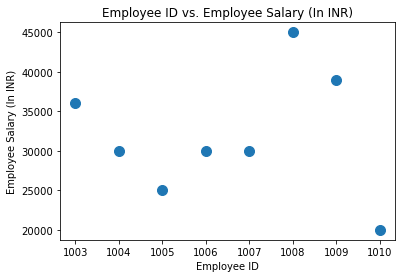

In [43]:
# basic plots
import matplotlib.pyplot as plt
plt.scatter(records_df['emp_id'], records_df['emp_salary'], s = 100)
plt.xlabel("Employee ID")
plt.ylabel("Employee Salary (In INR)")
plt.title("Employee ID vs. Employee Salary (In INR)")
plt.show()

### Reading User I/P and Inserting Records

### Approach - 1

In [44]:
sqlStr = """
         INSERT INTO employee
         VALUES('{emp_id}', '{emp_name}', '{emp_city}', '{emp_salary}');
         """
n = int(input("Please enter the number of records: "))
for i in range(n):
    emp_id_uip = int(input("Please enter the EMP-ID (Numeric): "))
    emp_name_uip = input("Please enter the EMP-Name (Text): ")
    emp_city_uip = input("Please enter the EMP-City (Text): ")
    emp_salary_uip = int(input("Please enter the EMP-Salary (Numeric): "))
    connection.execute(sqlStr.format(emp_id = emp_id_uip, emp_name = emp_name_uip, emp_city = emp_city_uip, emp_salary = emp_salary_uip))
        
connection.commit()    # to make the change permanent
print ("All data records got inserted successfully...")

Please enter the number of records:  2
Please enter the EMP-ID (Numeric):  1011
Please enter the EMP-Name (Text):  Bidhun
Please enter the EMP-City (Text):  Kolkata
Please enter the EMP-Salary (Numeric):  65000
Please enter the EMP-ID (Numeric):  1012
Please enter the EMP-Name (Text):  Sharmistha
Please enter the EMP-City (Text):  Noida
Please enter the EMP-Salary (Numeric):  70000


All data records got inserted successfully...


In [45]:
# now fetching all the reords from the employee table for verification
sqlStr = "SELECT * FROM employee;"
# read from table and point the cursor into the variable cur_table
cur_table = connection.execute(sqlStr)
for row in cur_table:
    print (f"Emp-ID: {row[0]}, Emp-Name: {row[1]}, Emp-City: {row[2]}, Emp-Salary: {row[3]}...")
print ("End of the display operation...")

Emp-ID: 1003, Emp-Name: Subham, Emp-City: Mumbai, Emp-Salary: 36000.0...
Emp-ID: 1004, Emp-Name: Dinesh, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1005, Emp-Name: Kakali, Emp-City: Mumbai, Emp-Salary: 25000.0...
Emp-ID: 1006, Emp-Name: Bimal, Emp-City: Hyderabad, Emp-Salary: 30000.0...
Emp-ID: 1007, Emp-Name: Tarun, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1008, Emp-Name: Rittik, Emp-City: Durgapur, Emp-Salary: 45000.0...
Emp-ID: 1009, Emp-Name: Barun, Emp-City: Hyderabad, Emp-Salary: 39000.0...
Emp-ID: 1010, Emp-Name: Utpal, Emp-City: Lucknow, Emp-Salary: 20000.0...
Emp-ID: 1011, Emp-Name: Bidhun, Emp-City: Kolkata, Emp-Salary: 65000.0...
Emp-ID: 1012, Emp-Name: Sharmistha, Emp-City: Noida, Emp-Salary: 70000.0...
End of the display operation...


### Approach - 2

In [46]:
n = int(input("Please enter the number of records: "))
cursor = connection.cursor()
for i in range(n):
    emp_id_uip = int(input("Please enter the EMP-ID (Numeric): "))
    emp_name_uip = input("Please enter the EMP-Name (Text): ")
    emp_city_uip = input("Please enter the EMP-City (Text): ")
    emp_salary_uip = int(input("Please enter the EMP-Salary (Numeric): "))
    cursor.execute("INSERT INTO employee VALUES (?, ?, ?, ?)", (emp_id_uip, emp_name_uip, emp_city_uip, emp_salary_uip))
    
connection.commit()    # to make the change permanent
print ("All data records got inserted successfully...")

Please enter the number of records:  2
Please enter the EMP-ID (Numeric):  1013
Please enter the EMP-Name (Text):  Sanjib
Please enter the EMP-City (Text):  Varanasi
Please enter the EMP-Salary (Numeric):  72000
Please enter the EMP-ID (Numeric):  1014
Please enter the EMP-Name (Text):  Samrat
Please enter the EMP-City (Text):  Hyderabad
Please enter the EMP-Salary (Numeric):  80000


All data records got inserted successfully...


In [47]:
# now fetching all the reords from the employee table for verification
sqlStr = "SELECT * FROM employee;"
# read from table and point the cursor into the variable cur_table
cur_table = connection.execute(sqlStr)
for row in cur_table:
    print (f"Emp-ID: {row[0]}, Emp-Name: {row[1]}, Emp-City: {row[2]}, Emp-Salary: {row[3]}...")
print ("End of the display operation...")

Emp-ID: 1003, Emp-Name: Subham, Emp-City: Mumbai, Emp-Salary: 36000.0...
Emp-ID: 1004, Emp-Name: Dinesh, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1005, Emp-Name: Kakali, Emp-City: Mumbai, Emp-Salary: 25000.0...
Emp-ID: 1006, Emp-Name: Bimal, Emp-City: Hyderabad, Emp-Salary: 30000.0...
Emp-ID: 1007, Emp-Name: Tarun, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1008, Emp-Name: Rittik, Emp-City: Durgapur, Emp-Salary: 45000.0...
Emp-ID: 1009, Emp-Name: Barun, Emp-City: Hyderabad, Emp-Salary: 39000.0...
Emp-ID: 1010, Emp-Name: Utpal, Emp-City: Lucknow, Emp-Salary: 20000.0...
Emp-ID: 1011, Emp-Name: Bidhun, Emp-City: Kolkata, Emp-Salary: 65000.0...
Emp-ID: 1012, Emp-Name: Sharmistha, Emp-City: Noida, Emp-Salary: 70000.0...
Emp-ID: 1013, Emp-Name: Sanjib, Emp-City: Varanasi, Emp-Salary: 72000.0...
Emp-ID: 1014, Emp-Name: Samrat, Emp-City: Hyderabad, Emp-Salary: 80000.0...
End of the display operation...
